# **Statistical Analyst Time Series Using Sunspot Data**
---
pada tahap ini kita akan melakukan preprocesing data lebih lanjut dengan menggunakan statistical analyst 

## **1.Statistical Analyst Using Sunspot Data**

### **1.1 Import Library**
---
pertama kita akan melakukan import library yang dibutuhkan untuk proses analisis statistik pada data sunspot

In [68]:
# import library yang dibutuhkan 
import numpy as np                              # import library untuk komputasi numerik 
import pandas as pd                             # import library untuk pengolahan datafrane 
import matplotlib.pyplot as plt                 # import library untuk visualisasi data dengan matplotlib 
import seaborn as sns                           # import library untuk visualisasi data dengan seaborn 
import os                                       # import library os untuk 
import statsmodels as sm

from warnings import simplefilter               # import library untuk handling error 
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import library untuk pengolahan statistik dalam bentuk visualisasi data
from statsmodels.tsa.arima_model import ARIMA                 # import library untuk pengolahan statistik dengan model ARIMA 
from dateutil.parser import parse                             # Libary untuk pengolahan dataframe time series 

# definisikan variabel untuk memfilter error yang ada 
simplefilter('ignore')
dateparse=lambda dates:parse(dates)

### **1.2 Load File CSV dengan library OS dan membaca file tersebut dengan pandas**
---
pada tahap ini kita akan melakukan load file yang sudah diolah sebelum nya pada kode exploration.ipynb dan menggunakan file tersebut untuk analisis lebih lanjut 

In [69]:
# Path ke folder
folder_path = "../data/raw"

# Menelusuri semua file di folder dan subfolder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):  # Menemukan file CSV
            file_path = os.path.join(root, file)
            print(f"File ditemukan: {file_path}")
            
            # Membaca file ke pandas
            df = pd.read_csv(file_path, parse_dates=['Date'], date_parser=dateparse)
            
            # Menampilkan 5 baris pertama
            print(df.head())


File ditemukan: ../data/raw\Sunspots.csv
   Unnamed: 0       Date  Monthly Mean Total Sunspot Number
0           0 1749-01-31                               96.7
1           1 1749-02-28                              104.3
2           2 1749-03-31                              116.7
3           3 1749-04-30                               92.8
4           4 1749-05-31                              141.7


In [70]:
df = df.drop(columns='Unnamed: 0', axis=True)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [71]:
df = df.set_index('Date')
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


### **1.3 Sunspots Data**

In [72]:
# Membaca data dari file
dta = df

# Membuat indeks waktu berdasarkan range tahun menggunakan pandas
date_range = pd.date_range(start="1700", end="2008", periods=len(dta))
dta.index = date_range
dta.index.freq = pd.infer_freq(dta.index)

# Menghapus kolom "YEAR" jika ada
if "YEAR" in dta.columns:
    del dta["YEAR"]

<Axes: >

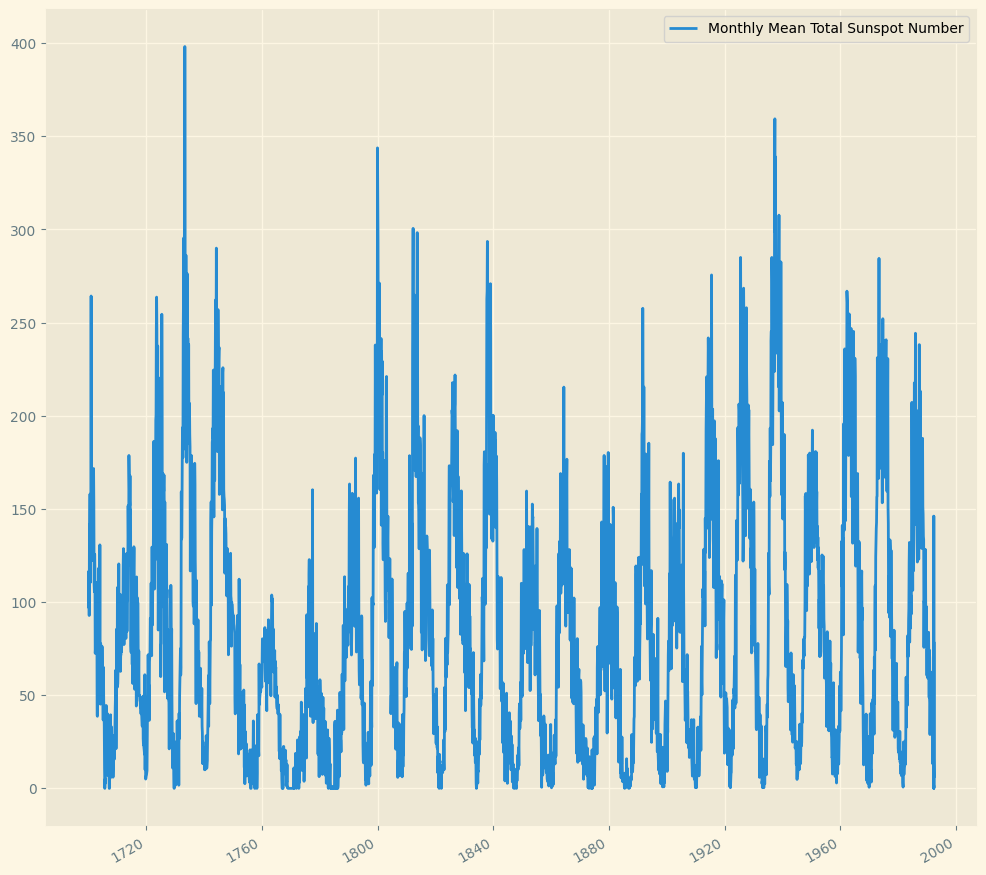

In [73]:
dta.plot(figsize=(12, 12))

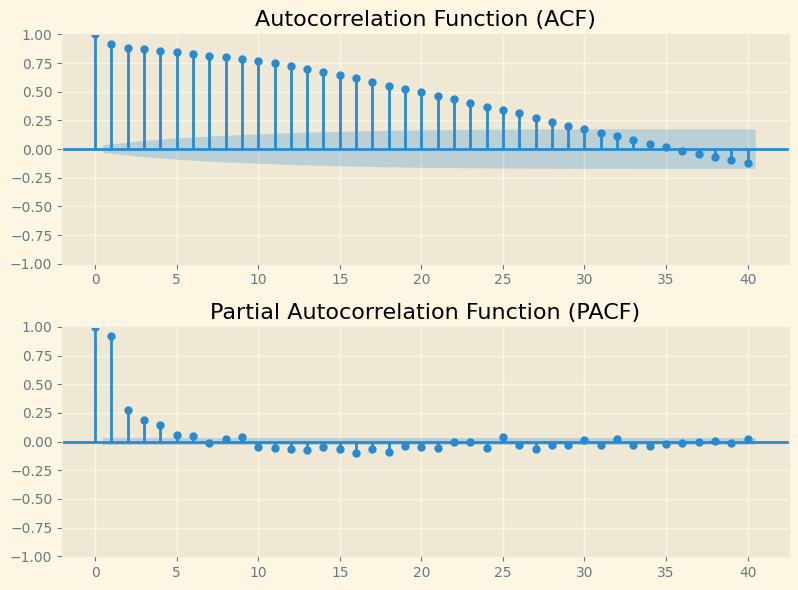

In [74]:
# Membuat plot ACF dan PACF
fig = plt.figure(figsize=(8, 6))

# Plot ACF
ax1 = fig.add_subplot(211)
plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")

# Plot PACF
ax2 = fig.add_subplot(212)
plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [75]:
from statsmodels.tsa.arima.model import ARIMA

# Misalnya, kita ingin membuat model ARIMA dengan urutan (2, 0, 0)
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()

# Menampilkan parameter model yang telah dilatih
print(arma_mod20.params)


const      82.070484
ar.L1       0.667000
ar.L2       0.273224
sigma2    671.166050
dtype: float64


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load dataset
data = pd.read_csv('../data/raw/Sunspots.csv', parse_dates=['Date'], index_col='Date')

# Tampilkan beberapa baris pertama untuk melihat struktur data
print(data.head())


            Unnamed: 0  Monthly Mean Total Sunspot Number
Date                                                     
1749-01-31           0                               96.7
1749-02-28           1                              104.3
1749-03-31           2                              116.7
1749-04-30           3                               92.8
1749-05-31           4                              141.7


In [77]:
data = data.drop(columns='Unnamed: 0', axis=True)
data.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


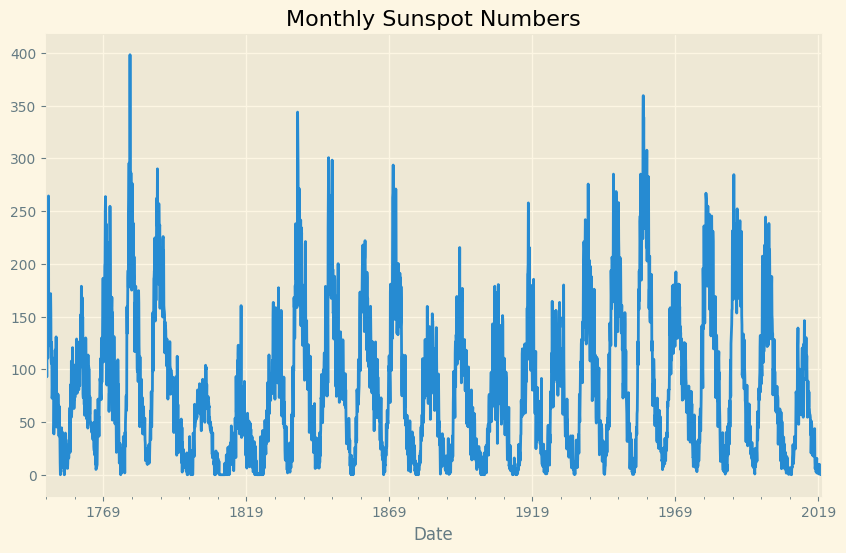

In [78]:
sunspots = data['Monthly Mean Total Sunspot Number']

# Plot data Sunspots
sunspots.plot(figsize=(10, 6))
plt.title('Monthly Sunspot Numbers')
plt.show()

In [79]:
result = adfuller(sunspots.dropna())  # Pastikan tidak ada nilai NaN
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("Data tidak stasioner, perlu differencing")
    # Jika p-value > 0.05, kita dapat mencoba differencing
    sunspots_diff = sunspots.diff().dropna()
    sunspots_diff.plot(figsize=(10, 6))
    plt.title('Differenced Sunspots')
    plt.show()


ADF Statistic: -10.480868432669846
p-value: 1.214714158650459e-18


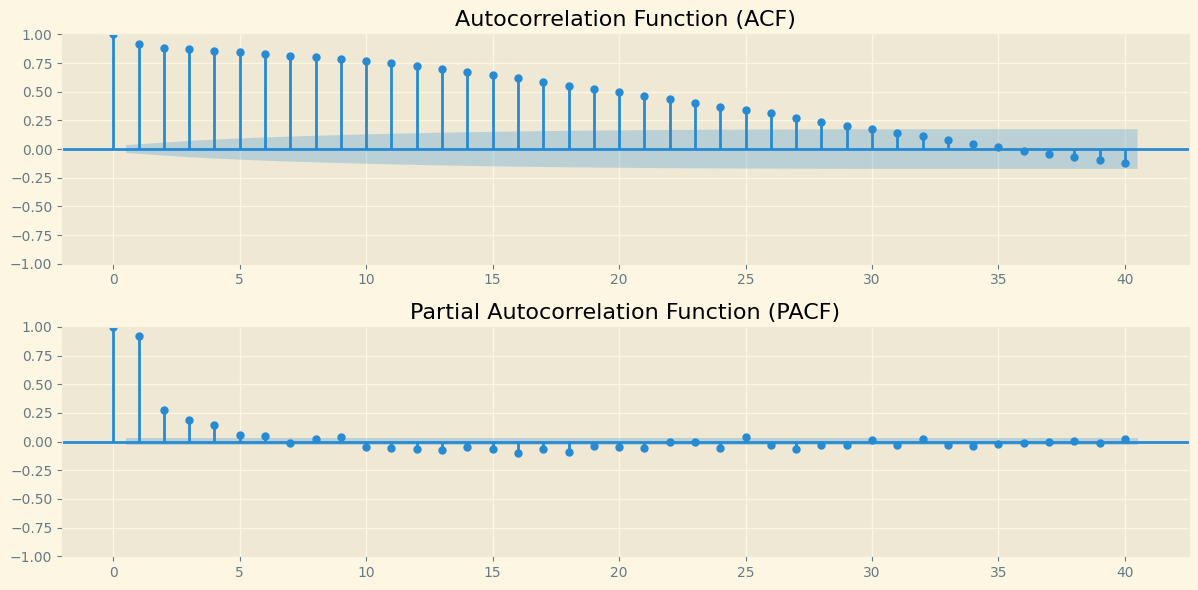

In [80]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plot ACF
plot_acf(data.values.squeeze(), lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# Plot PACF
plot_pacf(data.values.squeeze(), lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

# Adjust layout
plt.tight_layout()
plt.show()

In [81]:
arima_mod20 = ARIMA(data, order=(2,0,0)).fit()
print(arima_mod20.params)

const      82.070484
ar.L1       0.667000
ar.L2       0.273224
sigma2    671.166050
dtype: float64


In [82]:
arima_mod30 = ARIMA(data, order=(3,0,0)).fit()

In [83]:
print(arima_mod20.aic, arima_mod20.bic, arima_mod30.hqic)

30404.770864851173 30429.118966733844 30295.711460504703


In [84]:
from statsmodels.stats.stattools import durbin_watson 

# Gunakan resid dari model ARIMA
dw_stat = durbin_watson(arima_mod30.resid.values)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.053501805648196


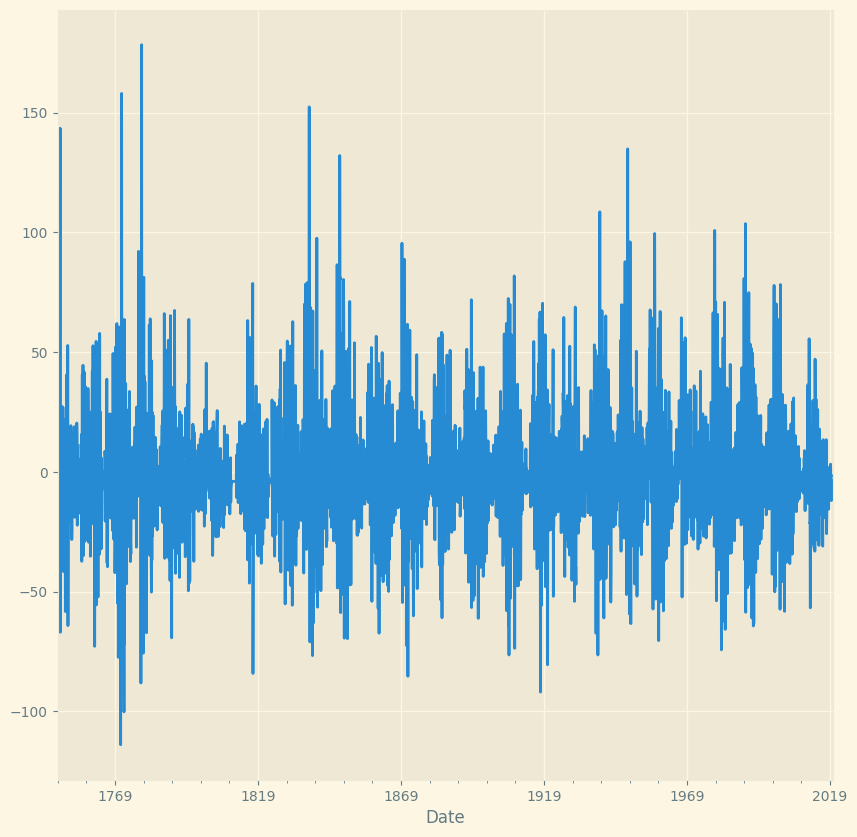

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax = arima_mod30.resid.plot(ax=ax)

In [86]:
resid = arima_mod30.resid

In [87]:
stats.normaltest(resid)

NormaltestResult(statistic=461.74053054436115, pvalue=5.423975969454872e-101)

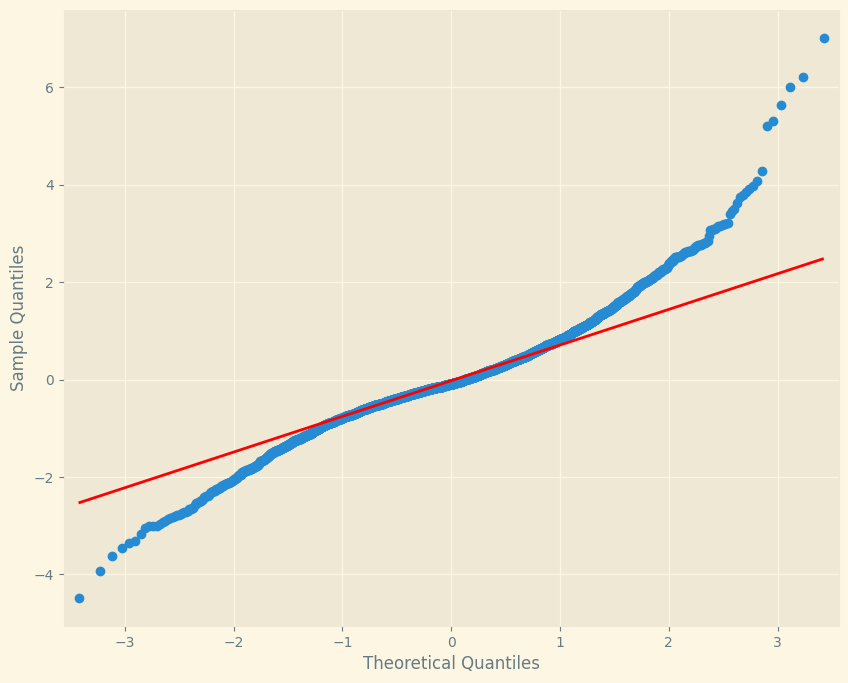

In [88]:
from statsmodels.graphics.api import qqplot

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)
plt.style.use('Solarize_Light2')

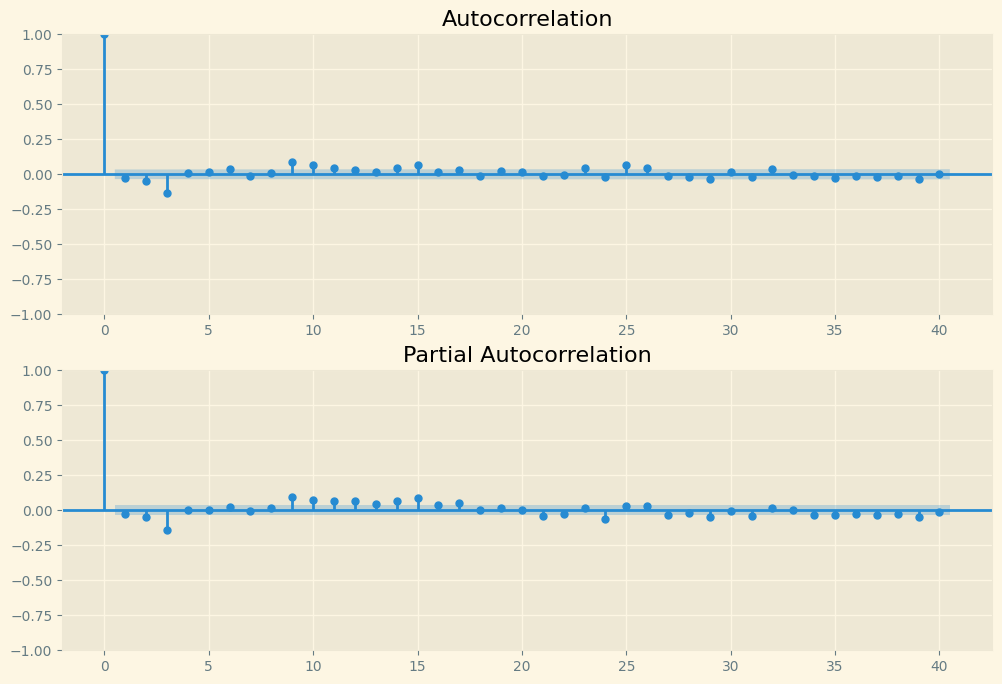

In [93]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
plot_acf(resid.values.squeeze(), lags=40, ax=ax1)  # Squeeze untuk array 1D

ax2 = fig.add_subplot(212)
plot_pacf(resid.values.squeeze(), lags=40, ax=ax2)  # Squeeze juga di sini

plt.show()

In [96]:
from statsmodels.tsa.stattools import acf

r, q, p = acf(resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[np.arange(1, len(r)), r[1:], q, p]
columns = ['lag', 'ACF', 'Q-stat', 'P-value']
acf_df = pd.DataFrame(data, columns=columns)
print(acf_df)

     lag       ACF      Q-stat       P-value
0    1.0 -0.026807    2.339011  1.261696e-01
1    2.0 -0.047906    9.811448  7.404081e-03
2    3.0 -0.136443   70.446227  3.425342e-15
3    4.0  0.011006   70.840854  1.508166e-14
4    5.0  0.013451   71.430518  5.161948e-14
5    6.0  0.040717   76.835297  1.607156e-14
6    7.0 -0.010232   77.176699  5.177959e-14
7    8.0  0.008505   77.412677  1.619267e-13
8    9.0  0.086752  101.970057  6.282456e-18
9   10.0  0.062966  114.911108  5.435523e-20
10  11.0  0.046315  121.914759  7.464882e-21
11  12.0  0.031236  125.101448  5.916924e-21
12  13.0  0.013774  125.721277  1.482180e-20
13  14.0  0.043792  131.988722  2.750551e-21
14  15.0  0.067352  146.818428  1.032009e-23
15  16.0  0.015834  147.638338  2.280892e-23
16  17.0  0.029068  150.402257  2.041710e-23
17  18.0 -0.014301  151.071433  4.600819e-23
18  19.0  0.020458  152.441357  7.402162e-23
19  20.0  0.013304  153.020865  1.656474e-22
20  21.0 -0.014263  153.687133  3.488427e-22
21  22.0 -

In [98]:
predict_sunspots = arima_mod30.predict("1990", "2012", dynamic=True)
print(predict_sunspots)

1990-01-31    209.198550
1990-02-28    208.939579
1990-03-31    203.319508
1990-04-30    199.405655
1990-05-31    196.134130
                 ...    
2012-08-31     82.093742
2012-09-30     82.092977
2012-10-31     82.092236
2012-11-30     82.091519
2012-12-31     82.090824
Freq: ME, Name: predicted_mean, Length: 276, dtype: float64
